In [15]:
#import neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt


#read the titanic dataset
data = pd.read_csv("titanic.csv")
print(data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [16]:
# Check for missing values in the entire dataset
missing_values_total = data.isnull().sum()
print("Missing values in the entire dataset:")
print(missing_values_total)


Missing values in the entire dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
# Prepare data
X_train = data.dropna(subset=['Age'])[['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']]
y_train = data.dropna(subset=['Age'])['Age']
X_pred = data[data['Age'].isnull()][['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']]

# Encode categorical variables (e.g., convert 'Sex' and 'Embarked' to numerical)
X_train_encoded = pd.get_dummies(X_train)
X_pred_encoded = pd.get_dummies(X_pred)

# Ensure both datasets have the same set of features
X_train_encoded, X_pred_encoded = X_train_encoded.align(X_pred_encoded, join='outer', axis=1, fill_value=0)

# Verify the shape of X_pred_encoded
print("Shape of X_pred_encoded:", X_pred_encoded.shape)

# Verify the columns of X_pred_encoded
print("Columns of X_pred_encoded:", X_pred_encoded.columns)


Shape of X_pred_encoded: (0, 8)
Columns of X_pred_encoded: Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch', 'Pclass',
       'Sex_female', 'Sex_male', 'SibSp'],
      dtype='object')


In [23]:
print("X_pred:")
print(X_pred)


X_pred:
Empty DataFrame
Columns: [Sex, Pclass, SibSp, Parch, Embarked]
Index: []


In [24]:
# Prepare data
X_train = data.dropna(subset=['Age'])[['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']]
y_train = data.dropna(subset=['Age'])['Age']
X_pred = data[data['Age'].isnull()][['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']]

# Check if there are any missing values in the 'Age' column
print("Number of missing values in 'Age' column:", X_pred.shape[0])

# If there are missing values, proceed with preparing the prediction dataset
if not X_pred.empty:
    # Encode categorical variables (e.g., convert 'Sex' and 'Embarked' to numerical)
    X_train_encoded = pd.get_dummies(X_train)
    X_pred_encoded = pd.get_dummies(X_pred)

    # Ensure both datasets have the same set of features
    X_train_encoded, X_pred_encoded = X_train_encoded.align(X_pred_encoded, join='outer', axis=1, fill_value=0)

    # Verify the shape of X_pred_encoded
    print("Shape of X_pred_encoded:", X_pred_encoded.shape)
    # Verify the columns of X_pred_encoded
    print("Columns of X_pred_encoded:", X_pred_encoded.columns)
else:
    print("No missing values in 'Age' column.")


Number of missing values in 'Age' column: 0
No missing values in 'Age' column.


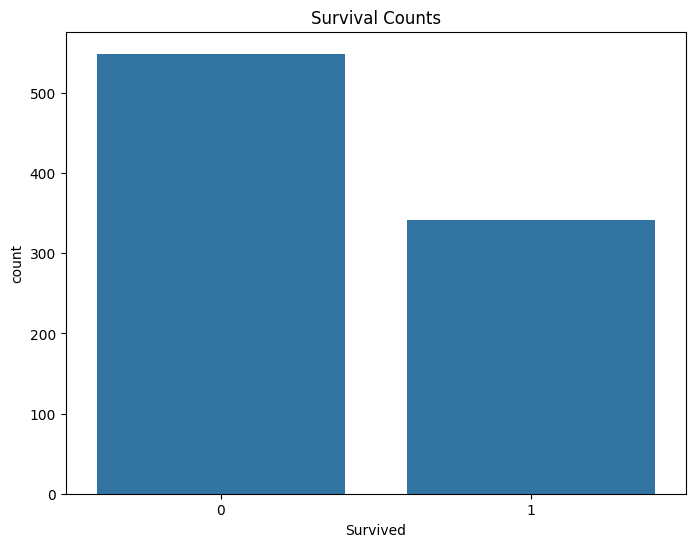

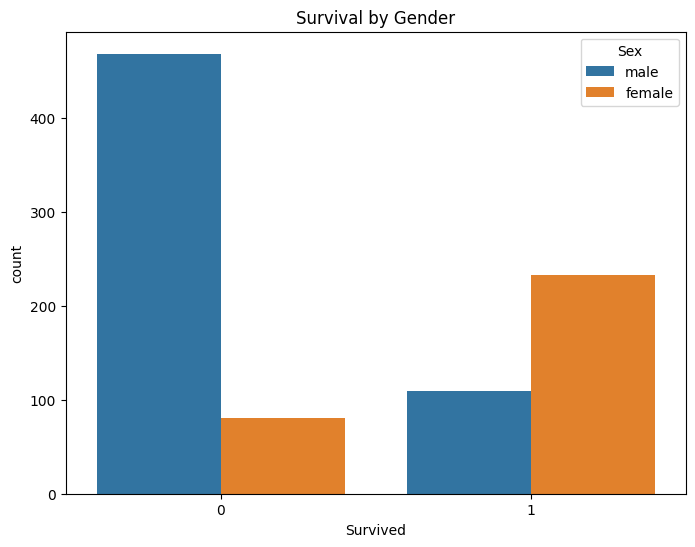

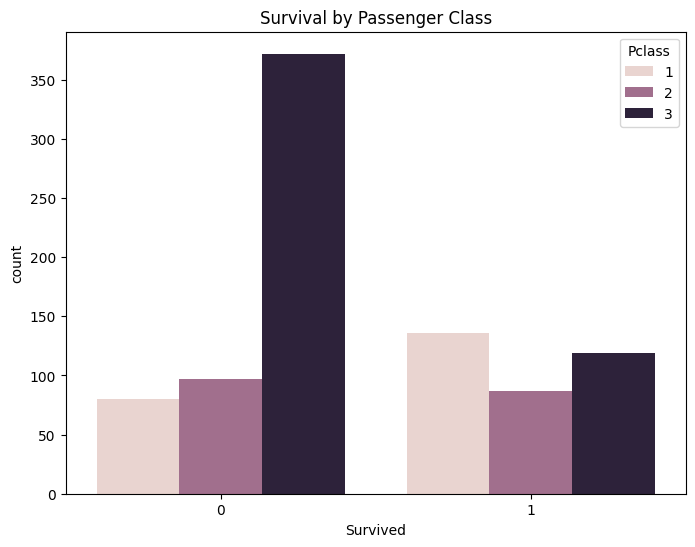

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot survival counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.title('Survival Counts')
plt.show()

# Plot survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()

# Plot survival by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Passenger Class')
plt.show()


1- What is the main factor that influence the survival rate? 
The analysis suggests that gender played a pivotal role in determining survival outcomes, with females exhibiting a survival rate more than double that of males. Additionally, individuals in the second class demonstrated a lower survival rate compared to other classes.

2- lifeboat for upper class? 
Based on the analysis of the 'Survival by Passenger Class' graph, it is discernible that individuals in the second class exhibit a notable decrease in survival rates compared to other classes. This observation suggests the plausibility of the lifeboat allocation scenario depicted in the movie. It is plausible that a limited number of lifeboats were allocated to a specific subset of the first-class passengers, accounting for their relatively higher survival rates. Moreover, the disparity in survival rates between the first and third classes appears marginal, indicating a relatively comparable outcome in terms of survival probability among these passenger groups.

3- "Women and children first”. Was this the case?
The significant number of missing values in the age column complicates our ability to accurately assess whether children were indeed given priority in terms of survival during the Titanic disaster. Without complete age data for all passengers, it's challenging to definitively identify and analyze the survival rates of children. However, despite this limitation, the higher survival rates among females still suggest a pattern of prioritization, indicating that women may have been given preferential treatment during the evacuation process.


Add one other observation that you have noted in the dataset.
A striking observation from the dataset is the stark disparity in survival rates among passengers of different classes. While a substantial number of individuals in the third class did not survive, it is noteworthy that the survival count for the second class is significantly lower than that of both the first and third classes. This discrepancy underscores the differential outcomes experienced by passengers across various socioeconomic classes during the Titanic disaster.